In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import seaborn as sns
import sys
sys.path.append('../')

import seaborn as sns

from lib.import_funcs import *


%load_ext autoreload
%autoreload 2

In [2]:
path = "/Users/cleliacorridori/Dropbox_2021 Dropbox/Jorah Mormont/GRN_Inference/" # for Mac
path_data = path+"DATA/"
# genes of OUR dataset
genes = np.loadtxt(path_data+'general_info/all_genes_list.csv', dtype="str")
cells = np.loadtxt(path_data+'general_info/all_cells_list.csv', dtype="str")
imp_genes = np.loadtxt(path_data+"general_info/imp_genes.csv", dtype="str") #selected genes

# time steps
time=["00h", "06h", "12h", "24h", "48h"]

# Genes Classification
naive = ["Klf4", "Klf2", "Esrrb", "Tfcp2l1", "Tbx3", "Stat3", "Nanog", "Sox2"]
formative = ["Nr0b1", "Zic3", "Rbpj", "Utf1", "Etv4", "Tcf15"]
committed = ["Dnmt3a", "Dnmt3b", "Lef1", "Otx2", "Pou3f1", "Etv5"]

# Selected genes order
genes_order = np.concatenate((naive, formative, committed))
nc_genes = np.setdiff1d(imp_genes, genes_order)
genes_order = np.concatenate((genes_order, nc_genes))
genes_order

array(['Klf4', 'Klf2', 'Esrrb', 'Tfcp2l1', 'Tbx3', 'Stat3', 'Nanog',
       'Sox2', 'Nr0b1', 'Zic3', 'Rbpj', 'Utf1', 'Etv4', 'Tcf15', 'Dnmt3a',
       'Dnmt3b', 'Lef1', 'Otx2', 'Pou3f1', 'Etv5', 'Gbx2', 'Pou5f1',
       'Sall4', 'Tcf7l1'], dtype='<U7')

# Original data from Kalkan

In [3]:
df_KO_2 = pd.read_excel(path_data+'Kalkan_Data/tripleKO2.xlsx', index_col=0, header=0, sheet_name=0)
# select only the genes of our dataset
df_KO_2=df_KO_2[df_KO_2.index.isin(genes_order)].reindex(genes_order)

In [4]:
# df_KO_2.columns
wt_logFC = np.log2(df_KO_2[["Control.N-72h.7",  "Control.N-72h.9","Control.N-72h.9"]].mean(axis=1)/df_KO_2[["Control.2i-p5.1",  "Control.2i-p5.2","Control.2i-p5.3"]].mean(axis=1))

In [5]:
# select only the columns that contains "log2FC" in the name
df_KO_2_sel = df_KO_2.filter(regex='tKO')

KO_logFC = df_KO_2_sel.iloc[:,:2]
KO_logFC

# remove rows with all nan values
KO_logFC = KO_logFC.dropna(how='all')

# check that the p-val is < 0.05
# if (KO_logFC['padj [ETR-tKO.N-p5/Control.2i-p5]'] >0.05).any():
#     print("There are p-values > 0.05")
#     # find the genes with p-val > 0.05
#     idx_pval = KO_lofFC['padj [ETR-tKO.N-p5/Control.2i-p5]'] >0.05   
# select only rows with p-val < 0.05
# KO_logFC = KO_logFC[~idx_pval]

KO_logFC.shape


(24, 2)

In [7]:
df_KO_2_sel

,log2FC [ETR-tKO.N-p5/Control.2i-p5],padj [ETR-tKO.N-p5/Control.2i-p5],ETR-tKO.N-p5.13,ETR-tKO.N-p5.14,ETR-tKO.N-p5.15
names,,,,,
Klf4,1.64100,6.886000e-32,28.8,38.3,36.7
Klf2,-0.05539,9.036000e-01,40.5,36.8,38.8
Esrrb,0.12400,4.155000e-01,83.2,114.6,105.4
Tfcp2l1,-0.06550,7.697000e-01,52.3,80.0,74.3
Tbx3,0.65080,3.946000e-04,13.3,21.9,21.0
Stat3,0.21600,1.670000e-01,3.2,4.2,4.1
Nanog,0.34520,1.527000e-03,356.0,377.6,371.2
Sox2,0.56980,5.429000e-06,168.1,190.2,190.8
Nr0b1,0.42710,4.572000e-03,28.3,40.9,37.4


In [27]:
diff_logFC = KO_logFC.iloc[:,1] - wt_logFC
diff_logFC

names
Klf4       3.776981
Klf2       4.715740
Esrrb      4.490047
Tfcp2l1    5.699438
Tbx3       4.302145
Stat3     -0.012706
Nanog      3.302174
Sox2       1.967480
Nr0b1      3.341222
Zic3       1.122436
Rbpj       0.104035
Utf1      -1.948829
Etv4      -5.209453
Tcf15     -0.518729
Dnmt3a    -1.511381
Dnmt3b    -4.454535
Lef1       0.055495
Otx2      -2.898985
Pou3f1    -7.238405
Etv5       0.277775
Gbx2       0.052467
Pou5f1     0.075314
Sall4      0.254721
Tcf7l1    -0.243926
dtype: float64

In [9]:
# logFC_KO_onlyData = KO_logFC.iloc[:,0].astype(float)
# save_data = False
# if save_data:
#     logFC_KO_onlyData.to_csv(path_data+r'Kalkan_Data/df_tripleKO.csv',  sep=',', mode='w')

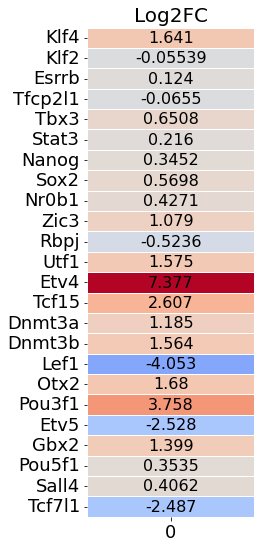

In [10]:
plt.figure(figsize=(3,9))
sns.heatmap(np.array(KO_logFC.iloc[:,:1]), annot=True, fmt="g", 
            yticklabels=KO_logFC.index, 
           cmap="coolwarm", cbar=False, center=0, linewidth=.5, annot_kws={"size":16, 'color':'black'})
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("Log2FC", fontsize=20)
plt.show()

In [31]:
np.array(diff_logFC).reshape((24,1))

array([[ 3.77698127],
       [ 4.71573998],
       [ 4.49004695],
       [ 5.69943766],
       [ 4.30214481],
       [-0.01270602],
       [ 3.30217432],
       [ 1.96747953],
       [ 3.3412216 ],
       [ 1.12243608],
       [ 0.10403494],
       [-1.94882912],
       [-5.20945337],
       [-0.5187288 ],
       [-1.51138137],
       [-4.45453485],
       [ 0.05549511],
       [-2.8989854 ],
       [-7.23840474],
       [ 0.27777459],
       [ 0.05246742],
       [ 0.07531371],
       [ 0.25472059],
       [-0.24392558]])

In [35]:
diff_logFC = diff_logFC.astype(float)
save_data = True
if save_data:
    diff_logFC.to_csv(path_data+r'Kalkan_Data/df_tripleKO_diff.csv',  sep=',', mode='w')



names
Klf4       3.776981
Klf2       4.715740
Esrrb      4.490047
Tfcp2l1    5.699438
Tbx3       4.302145
Stat3     -0.012706
Nanog      3.302174
Sox2       1.967480
Nr0b1      3.341222
Zic3       1.122436
Rbpj       0.104035
Utf1      -1.948829
Etv4      -5.209453
Tcf15     -0.518729
Dnmt3a    -1.511381
Dnmt3b    -4.454535
Lef1       0.055495
Otx2      -2.898985
Pou3f1    -7.238405
Etv5       0.277775
Gbx2       0.052467
Pou5f1     0.075314
Sall4      0.254721
Tcf7l1    -0.243926
dtype: float64

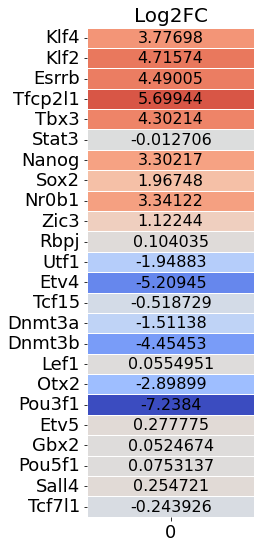

In [33]:
plt.figure(figsize=(3,9))
sns.heatmap(np.array(diff_logFC).reshape((24,1)), annot=True, fmt="g", 
            yticklabels=KO_logFC.index, 
           cmap="coolwarm", cbar=False, center=0, linewidth=.5, annot_kws={"size":16, 'color':'black'})
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("Log2FC", fontsize=20)
plt.show()